In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('..')

In [7]:
os.getcwd()

'/home/akshey/Desktop/PhD/Code_repositories/comparison-algorithms'

## Behaviour evaluation plots

<IPython.core.display.Javascript object>


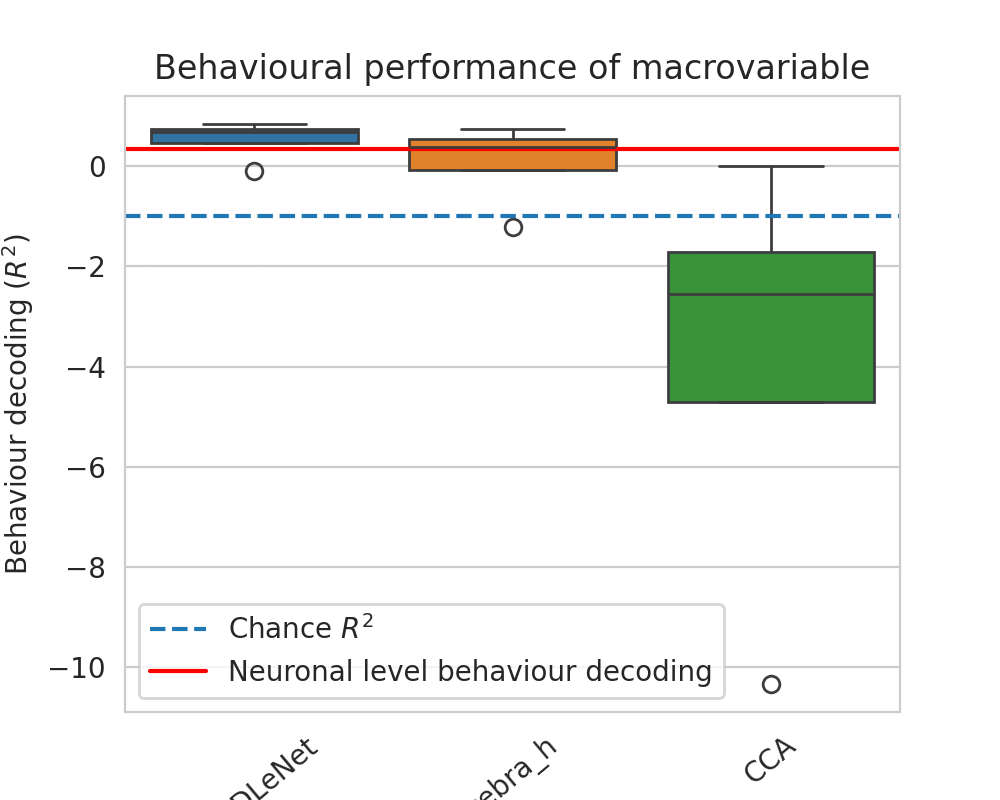

/tmp/ipykernel_1858440/2390468831.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=40)


In [8]:
### POOLING RATS
algorithms = ['BunDLeNet', 'cebra_h', 'CCA']# ['BunDLeNet', 'cebra_h', 'CCA', 'PCA']
r2_array = []
for alg in algorithms:
    rat_i_r2 = []
    rat_chance_r2 = []
    rat_X_r2 = []
    for rat_name in ['achilles', 'gatsby','cicero', 'buddy']:
        r2 = np.loadtxt('data/generated/rat_evaluation_metrics/r2_list_' + alg + '_rat_' +   rat_name)
        X_r2 = np.loadtxt('data/generated/rat_evaluation_metrics/r2_list_X_rat_'+ rat_name).max()
        chance_r2 = np.loadtxt('data/generated/rat_evaluation_metrics/r2_list_chance_rat_'+ rat_name).mean()
        rat_i_r2.append(r2.mean())
        rat_chance_r2.append(chance_r2)
        rat_X_r2.append(X_r2)
        
    r2_array.append(rat_i_r2)

r2_array = np.array(r2_array)
rat_chance_r2 = np.array(rat_chance_r2)
rat_X_r2 = np.array(rat_X_r2)


plt.figure(figsize=(5,4))
ax = sns.boxplot(data=r2_array.T)
ax.set_xticklabels(algorithms, rotation=40)
ax.set(ylabel = "Behaviour decoding ($R^2$)", title ='Behavioural performance of macrovariable')
ax.axhline(rat_chance_r2.mean(), linestyle='--',label='Chance $R^2$') ### Chance accuracy (see Evaluation .ipynb)
ax.axhline(rat_X_r2.mean(), linestyle='-',label='Neuronal level behaviour decoding', color='red') ### Chance accuracy (see Evaluation .ipynb)

ax.legend()

<IPython.core.display.Javascript object>


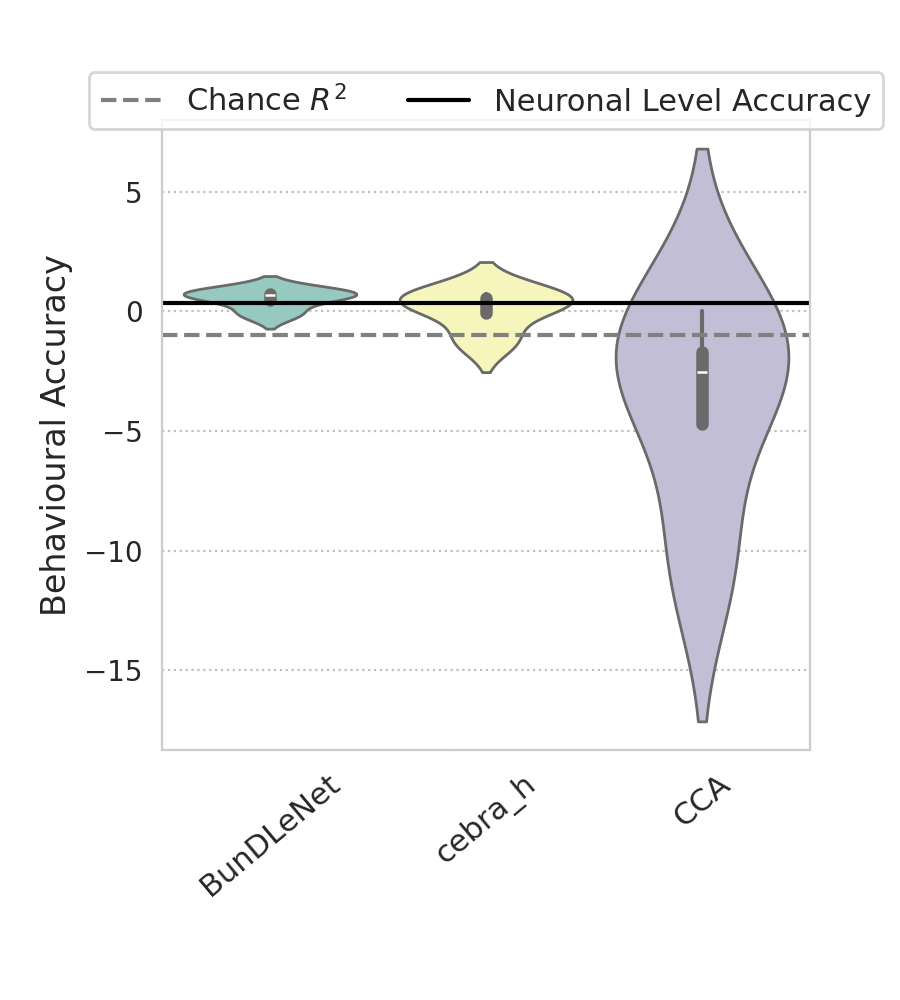

/tmp/ipykernel_1858440/2143182516.py:4: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  ax = sns.violinplot(data=r2_array.T, linewidth=1, palette=color_palette)
/tmp/ipykernel_1858440/2143182516.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=40, fontsize=11)


In [9]:
sns.set_style("whitegrid")
color_palette = sns.color_palette("Set3")
plt.figure(figsize=(4.5, 5))
ax = sns.violinplot(data=r2_array.T, linewidth=1, palette=color_palette)
ax.set_xticklabels(algorithms, rotation=40, fontsize=11)
ax.set_ylabel("Behavioural Accuracy", fontsize=12)
ax.axhline(rat_chance_r2.mean(), linestyle='--', label='Chance $R^2$', color='gray')
ax.axhline(rat_X_r2.mean(), linestyle='-', label='Neuronal Level Accuracy', color='black')
ax.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
plt.subplots_adjust(bottom=0.25, left=0.18)
ax.legend(fontsize=11, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
#plt.savefig('Figures/behavioural_performance.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [10]:
''' # Evaluations for each rat individually
for rat_name in ['achilles', 'gatsby','cicero', 'buddy']:
    acc_array = []
    algorithms = ['cebra_h', 'BunDLeNet']
    for alg in algorithms:
        acc_array.append( np.loadtxt('data/generated/evaluation_metrics/acc_list_' + alg + '_rat_' +  str(rat_name)) )
    acc_array = np.array(acc_array)
    ### Neuronal level accuracy (X)
    X_r2 = np.loadtxt('data/generated/evaluation_metrics/acc_list_X_rat_'+str(rat_name)).max()
    chance_r2 = np.loadtxt('data/generated/evaluation_metrics/acc_list_chance_rat_'+str(rat_name)).mean()



    plt.figure(figsize=(5,4))
    ax = sns.violinplot(data=acc_array.T[:,:7])
    ax.set_xticklabels(['CEBRA-h', 'BunDLe Net'], rotation=40)
    ax.set(ylabel = "Decoding accuracy", title ='Behavioural performance of macrovariable')
    ax.axhline(chance_r2, linestyle='--',label='Chance accuracy') ### Chance accuracy (see Evaluation .ipynb)
    ax.axhline(X_r2, linestyle='-',label='Neuronal level accuracy', color='red') ### Chance accuracy (see Evaluation .ipynb)

    ax.legend()
    plt.savefig('behavioural_performance.pdf', transparent=True)
'''

' # Evaluations for each rat individually\nfor rat_name in [\'achilles\', \'gatsby\',\'cicero\', \'buddy\']:\n    acc_array = []\n    algorithms = [\'cebra_h\', \'BunDLeNet\']\n    for alg in algorithms:\n        acc_array.append( np.loadtxt(\'data/generated/evaluation_metrics/acc_list_\' + alg + \'_rat_\' +  str(rat_name)) )\n    acc_array = np.array(acc_array)\n    ### Neuronal level accuracy (X)\n    X_r2 = np.loadtxt(\'data/generated/evaluation_metrics/acc_list_X_rat_\'+str(rat_name)).max()\n    chance_r2 = np.loadtxt(\'data/generated/evaluation_metrics/acc_list_chance_rat_\'+str(rat_name)).mean()\n\n\n\n    plt.figure(figsize=(5,4))\n    ax = sns.violinplot(data=acc_array.T[:,:7])\n    ax.set_xticklabels([\'CEBRA-h\', \'BunDLe Net\'], rotation=40)\n    ax.set(ylabel = "Decoding accuracy", title =\'Behavioural performance of macrovariable\')\n    ax.axhline(chance_r2, linestyle=\'--\',label=\'Chance accuracy\') ### Chance accuracy (see Evaluation .ipynb)\n    ax.axhline(X_r2, lines

## Dynamics evaluation plots

<IPython.core.display.Javascript object>


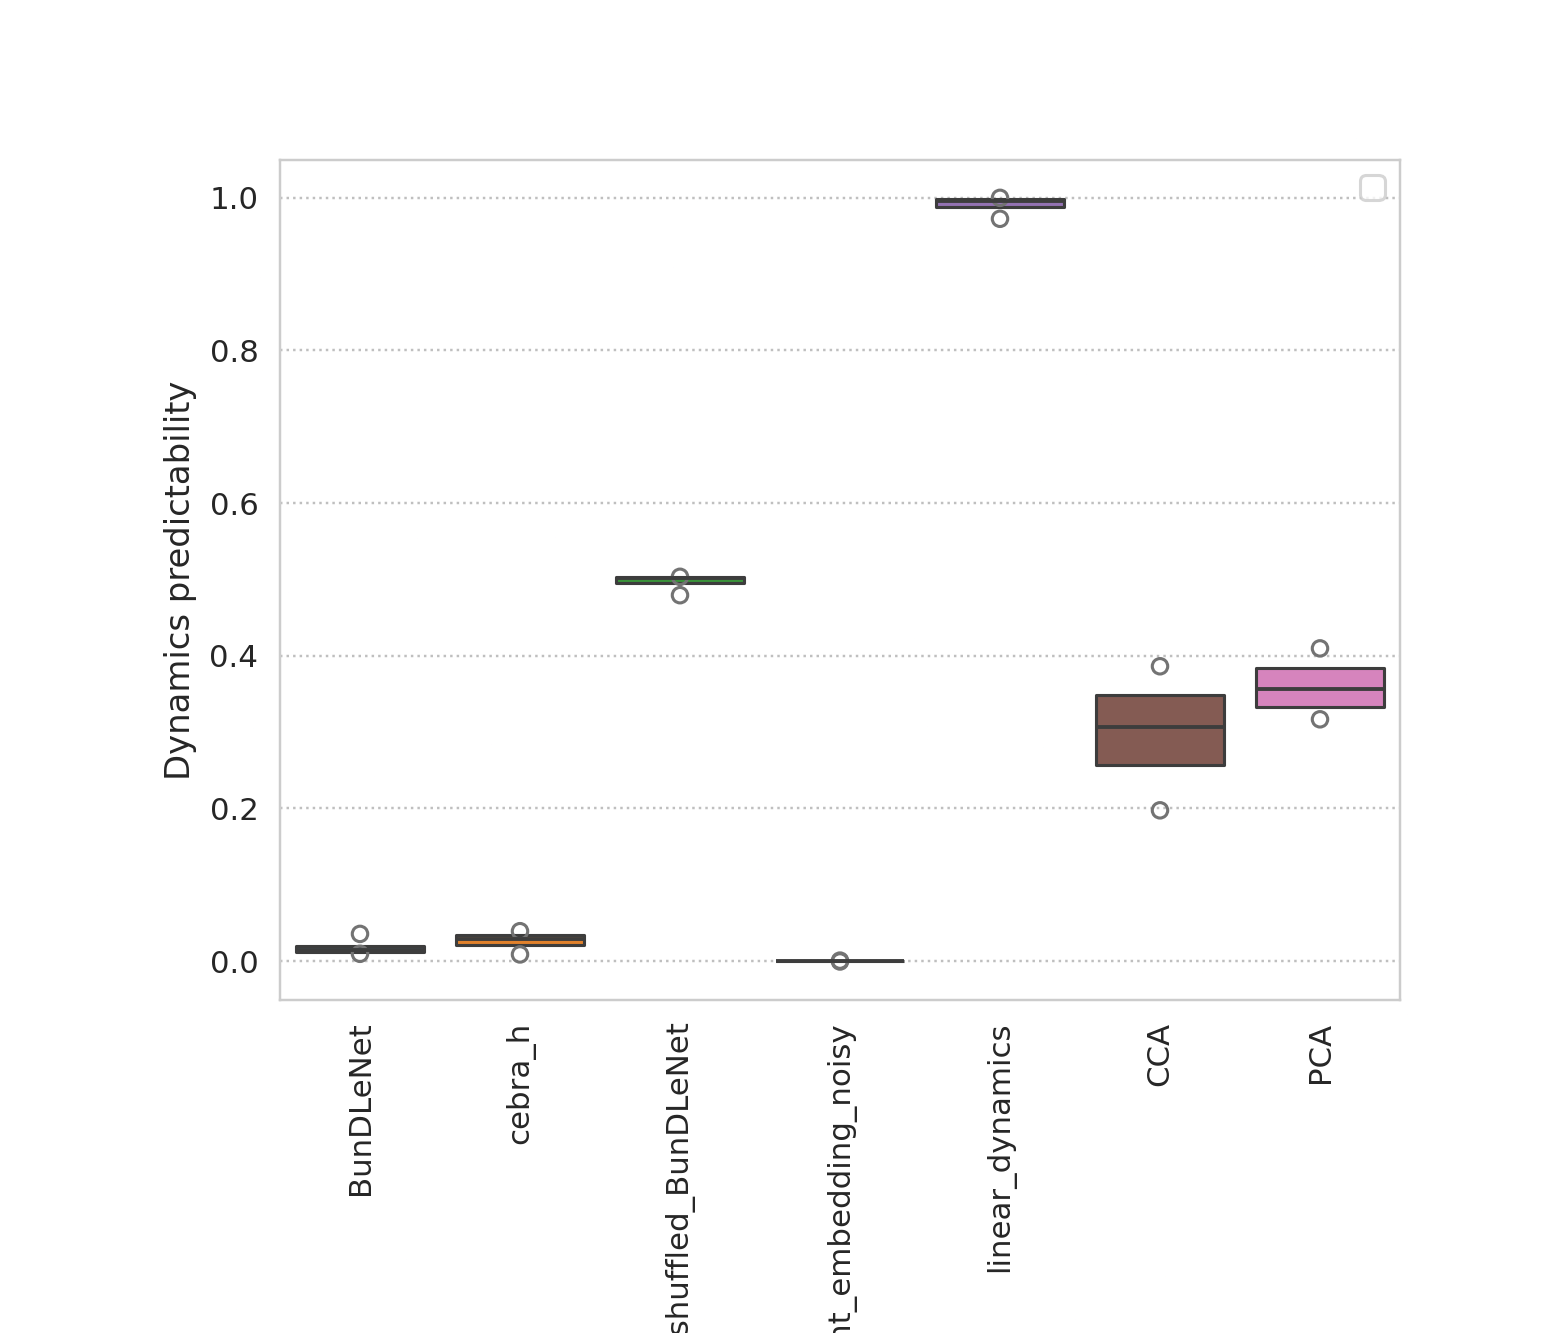

/tmp/ipykernel_1858440/426610522.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=90, fontsize=10)
/tmp/ipykernel_1858440/426610522.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


In [67]:
%matplotlib notebook

### POOLING ratS
'''
algorithms = ['cebra_h', 'BunDLeNet']
acc_array = []
for alg in algorithms:
    rat_i_r2 = []
    '''
algorithms = ['BunDLeNet', 'cebra_h', 'y_shuffled_BunDLeNet', 'point_embedding_noisy', 'linear_dynamics',  'CCA', 'PCA']
dp_array = []
for alg in algorithms:
    rat_i_dp = []
    for rat_name in ['achilles', 'gatsby','cicero', 'buddy']:
        mse = np.loadtxt('data/generated/rat_evaluation_metrics/mse_list_' + alg + '_rat_' +  str(rat_name))
        dyn_pred = 1 -  mse[:,3]/mse[:,2]
        rat_i_dp.append(dyn_pred.mean())
        # print(alg, rat_name, dyn_pred)

    dp_array.append(rat_i_dp)
    
dp_array = np.array(dp_array)


plt.figure(figsize=(7, 6))
ax = sns.boxenplot(data=dp_array.T, linewidth=1)


ax.set_xticklabels(algorithms, rotation=90, fontsize=10)
ax.yaxis.set_label_text("Dynamics predictability", fontsize=11)
# ax.axhline(0.0, linestyle='--',label='Baseline model', color='gray') ### Baseline goodness of fit (by definition)
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
# Adjust the bottom margin
plt.subplots_adjust(bottom=0.25, left=0.18)  # You can modify this value as needed
ax.legend()

<IPython.core.display.Javascript object>


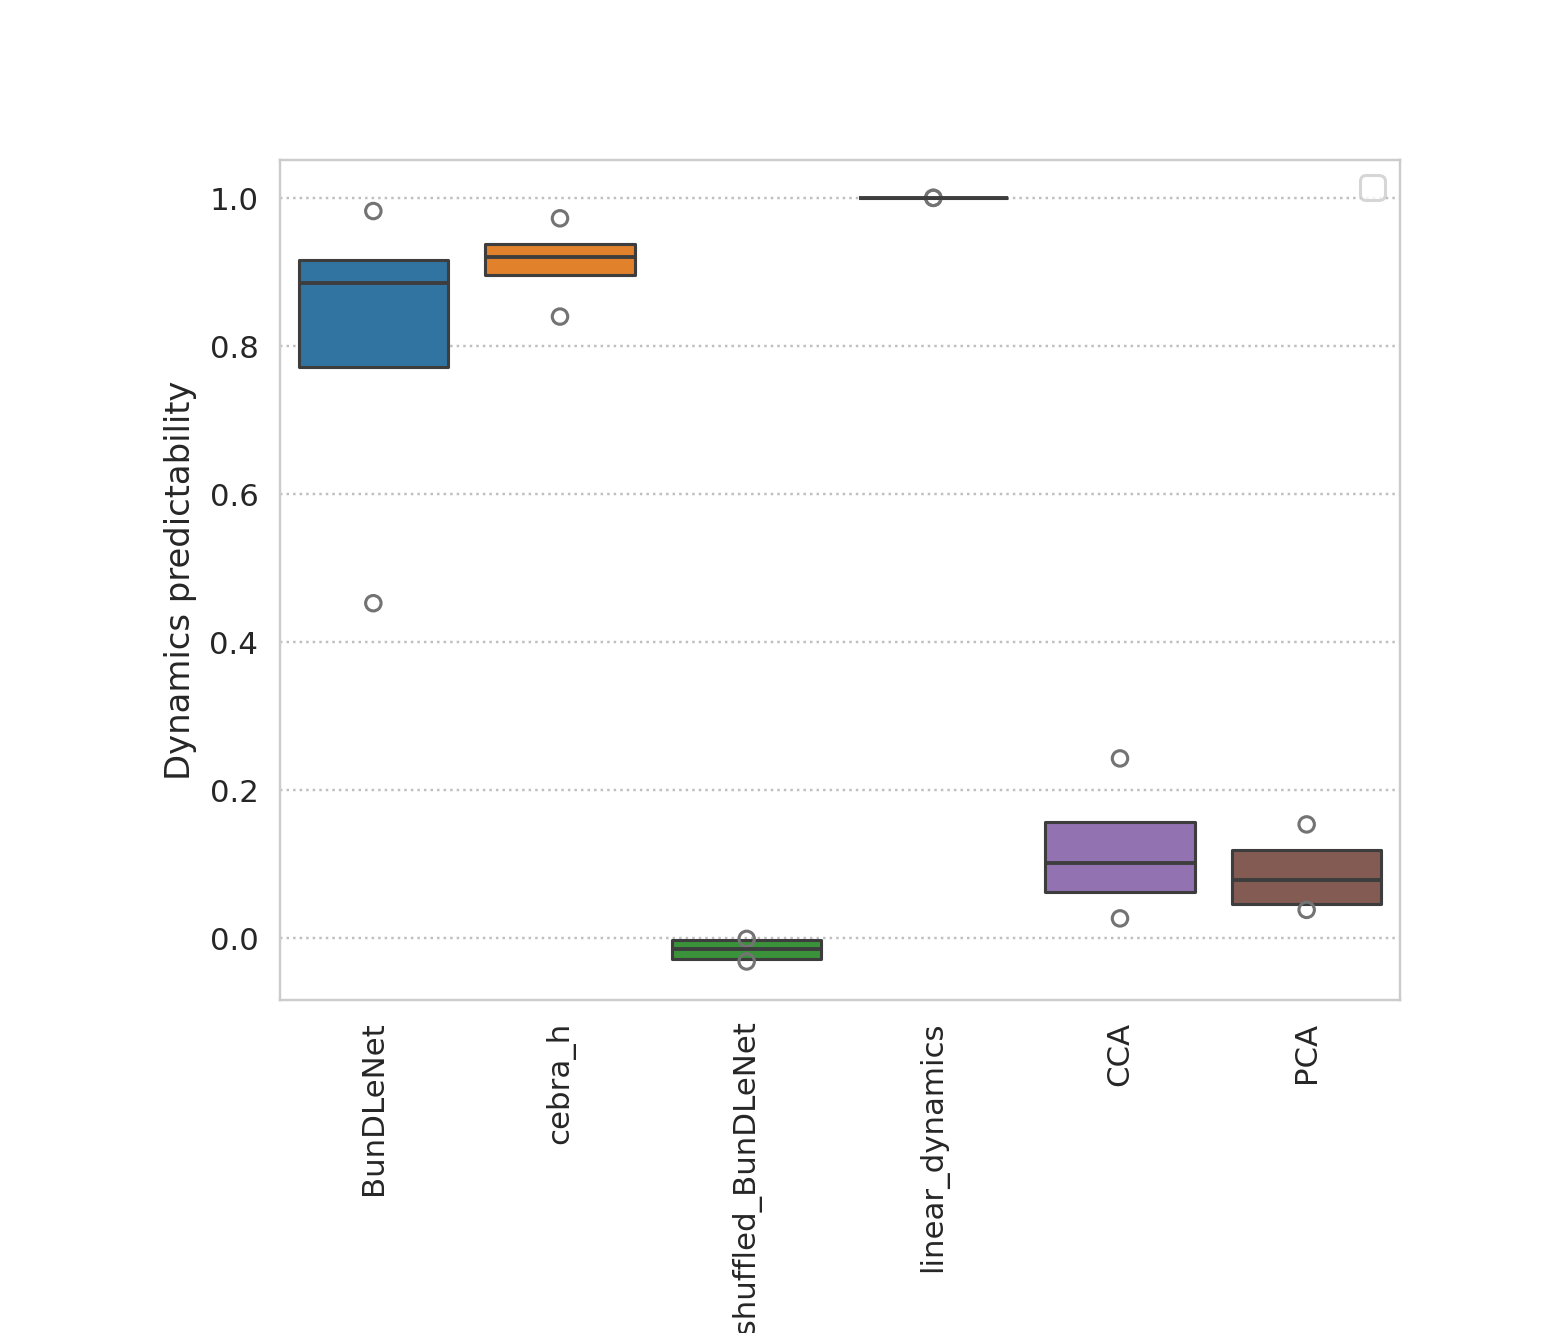

/tmp/ipykernel_1858440/2993388692.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=90, fontsize=10)
/tmp/ipykernel_1858440/2993388692.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


In [72]:
%matplotlib notebook

### R2
algorithms = ['BunDLeNet', 'cebra_h', 'y_shuffled_BunDLeNet', 'linear_dynamics',  'CCA', 'PCA']
dp_array = []
for alg in algorithms:
    rat_i_dp = []
    for rat_name in ['achilles', 'gatsby','cicero', 'buddy']:
        r2 = np.loadtxt('data/generated/rat_evaluation_metrics/r2_list_' + alg + '_rat_' +  str(rat_name))
        dyn_pred = r2[:,3]
        rat_i_dp.append(dyn_pred.mean())
        # print(alg, rat_name, dyn_pred)

    dp_array.append(rat_i_dp)
    
dp_array = np.array(dp_array)


plt.figure(figsize=(7, 6))
ax = sns.boxenplot(data=dp_array.T, linewidth=1)


ax.set_xticklabels(algorithms, rotation=90, fontsize=10)
ax.yaxis.set_label_text("Dynamics predictability", fontsize=11)
# ax.axhline(0.0, linestyle='--',label='Baseline model', color='gray') ### Baseline goodness of fit (by definition)
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
# Adjust the bottom margin
plt.subplots_adjust(bottom=0.25, left=0.18)  # You can modify this value as needed
ax.legend()

<IPython.core.display.Javascript object>


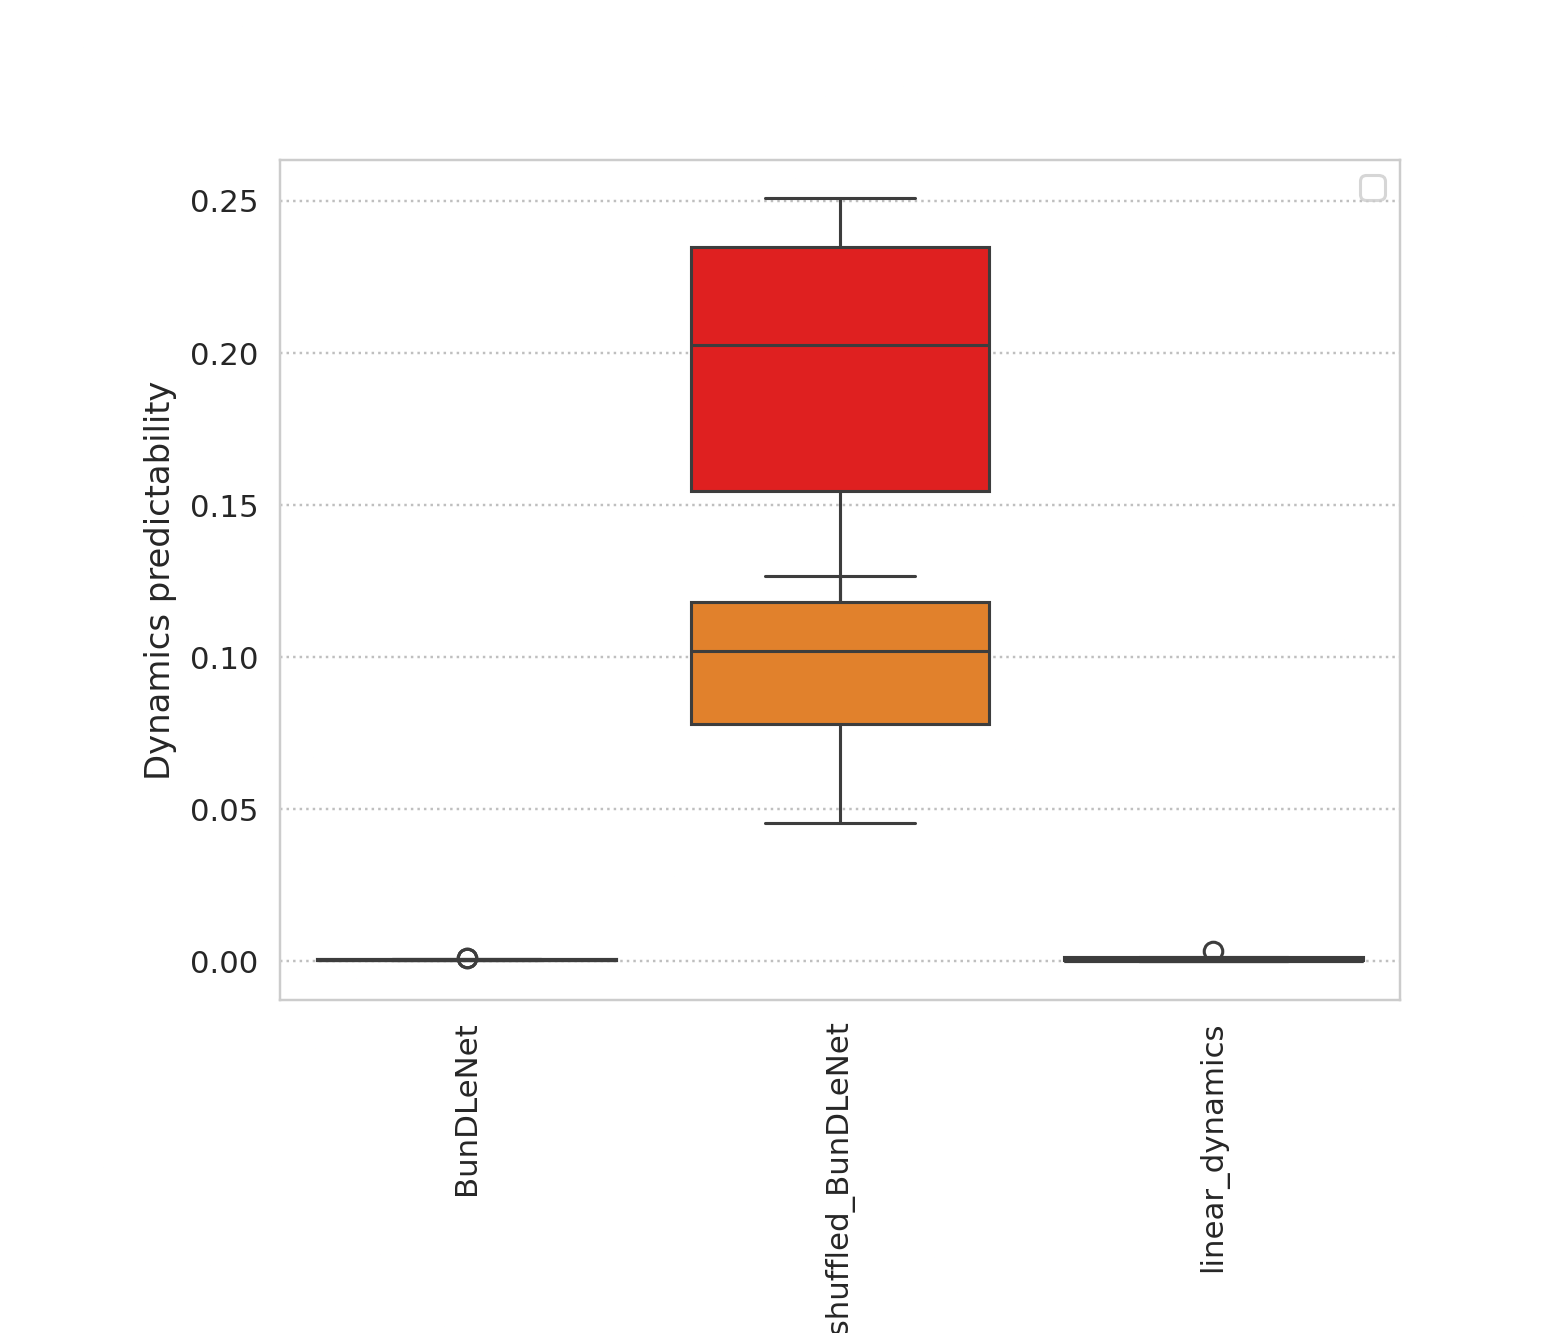

[[3.88578633e-04 4.15014164e-04 1.14047980e-03 5.15886178e-04]
 [1.26512162e-01 1.15335711e-01 4.54066373e-02 8.87433929e-02]
 [2.15387646e-06 2.22341158e-07 3.21452735e-09 4.10617963e-06]]


/tmp/ipykernel_1858440/2573323125.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=90, fontsize=10)
/tmp/ipykernel_1858440/2573323125.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


In [64]:
%matplotlib notebook


'''
algorithms = ['cebra_h', 'BunDLeNet']
acc_array = []
for alg in algorithms:
    rat_i_r2 = []
    '''
algorithms = ['BunDLeNet', 'y_shuffled_BunDLeNet', 'linear_dynamics']
dp_array = []
bp_array = []
for alg in algorithms:
    rat_i_dp = []
    rat_i_bp = []
    for rat_name in ['achilles', 'gatsby','cicero', 'buddy']:
        mse = np.loadtxt('data/generated/rat_evaluation_metrics/mse_list_' + alg + '_rat_' +  str(rat_name))
        dyn_pred = mse[:,3]
        baseline_pred = mse[:,2]
        #dyn_pred = 1 -  mse[:,3]/mse[:,2]
        rat_i_dp.append(dyn_pred.mean())
        rat_i_bp.append(baseline_pred.mean())
        # print(alg, rat_name, dyn_pred)

    dp_array.append(rat_i_dp)
    bp_array.append(rat_i_bp)
    
dp_array = np.array(dp_array)
bp_array = np.array(bp_array)


plt.figure(figsize=(7, 6))
ax = sns.boxplot(data=bp_array.T, linewidth=1, color='r')
ax = sns.boxplot(data=dp_array.T, linewidth=1)

print(dp_array)

ax.set_xticklabels(algorithms, rotation=90, fontsize=10)
ax.yaxis.set_label_text("Dynamics predictability", fontsize=11)
# ax.axhline(0.0, linestyle='--',label='Baseline model', color='gray') ### Baseline goodness of fit (by definition)
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
# Adjust the bottom margin
plt.subplots_adjust(bottom=0.25, left=0.18)  # You can modify this value as needed
ax.legend()

In [26]:
dp_array

array([[2.26770201e-03, 1.06035697e-02, 2.61232189e-02, 9.09636372e-03],
       [8.94114873e-03, 2.27401371e-02, 5.08114904e-02, 2.44711844e-02],
       [7.93866327e-01, 8.92124865e-01, 7.95485283e-01, 8.19916268e-01],
       [2.88813884e-01, 3.35253043e-01, 1.41380646e-01, 1.96572047e-01],
       [1.17758218e-01, 1.06062440e-01, 4.32201268e-02, 8.45728742e-02],
       [1.64343167e-07, 1.65145052e-07, 1.66305772e-07, 1.68258558e-07],
       [4.95344256e-06, 5.87819303e-07, 1.25522056e-08, 7.53704821e-06]])

In [27]:
bp_array

array([[2.35090006e-03, 1.07013875e-02, 2.65072258e-02, 9.21407574e-03],
       [9.01462184e-03, 2.33259559e-02, 5.28513167e-02, 2.53056581e-02],
       [9.88439086e-01, 1.23401588e+00, 1.29362267e+00, 1.23216193e+00],
       [4.22737349e-01, 5.06310628e-01, 2.39293423e-01, 3.14811261e-01],
       [2.31240984e-01, 2.11973836e-01, 8.63733859e-02, 1.65900656e-01],
       [1.64381938e-07, 1.65006548e-07, 1.66192936e-07, 1.68310361e-07],
       [3.62132940e-04, 3.78909205e-04, 4.66944562e-04, 3.53714634e-04]])

In [28]:
1 - dp_array/bp_array

array([[ 3.53898688e-02,  9.14066652e-03,  1.44868762e-02,
         1.27752389e-02],
       [ 8.15043730e-03,  2.51144580e-02,  3.85955636e-02,
         3.29757779e-02],
       [ 1.96848507e-01,  2.77055607e-01,  3.85071629e-01,
         3.34571011e-01],
       [ 3.16800646e-01,  3.37851064e-01,  4.09174542e-01,
         3.75587625e-01],
       [ 4.90755420e-01,  4.99643719e-01,  4.99612916e-01,
         4.90219773e-01],
       [ 2.35861537e-04, -8.39383646e-04, -6.78947690e-04,
         3.07781722e-04],
       [ 9.86321480e-01,  9.98448654e-01,  9.99973118e-01,
         9.78691726e-01]])

/tmp/ipykernel_1566001/3925546422.py:4: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  ax = sns.violinplot(data=dp_array.T[:6], linewidth=1, palette=color_palette)
/tmp/ipykernel_1566001/3925546422.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(algorithms, rotation=40, fontsize=11)


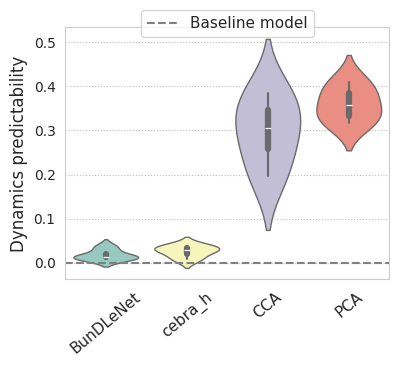

In [8]:
sns.set_style("whitegrid")
color_palette = sns.color_palette("Set3")
plt.figure(figsize=(4.5, 4))
ax = sns.violinplot(data=dp_array.T[:6], linewidth=1, palette=color_palette)
ax.set_xticklabels(algorithms, rotation=40, fontsize=11)
ax.yaxis.set_label_text("Dynamics predictability", fontsize=12)

ax.axhline(0.0, linestyle='--',label='Baseline model', color='gray') ### Baseline goodness of fit (by definition)
ax.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
plt.subplots_adjust(bottom=0.25, left=0.18)
ax.legend(fontsize=11, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
#plt.savefig('Figures/dynamical_performance.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [7]:
''' # Evaluations for each rat individually
for rat_name in ['achilles', 'gatsby','cicero', 'buddy']:
    mse_array = []
    algorithms = ['cebra_h', 'BunDLeNet']
    for alg in algorithms:
        filename = 'data/generated/evaluation_metrics/mse_list_' + alg + '_rat_' +  str(rat_name)
        mse_array.append(np.loadtxt(filename))
    mse_array = np.array(mse_array)
    goodness_of_fit = 1 -  mse_array[:,:,3]/mse_array[:,:,2]


    plt.figure(figsize=(4.5, 4))
    ax = sns.violinplot(data=goodness_of_fit.T, linewidth=.5)
    ax.set_xticklabels([ 'CEBRA-h' 'BunDLe-Net'], rotation=40, fontsize=10)
    ax.yaxis.set_label_text("Dynamics predictability", fontsize=11)
    ax.axhline(0.0, linestyle='--',label='Baseline model', color='gray') ### Baseline goodness of fit (by definition)
    plt.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
    # Adjust the bottom margin
    plt.subplots_adjust(bottom=0.25, left=0.18)  # You can modify this value as needed
    ax.legend()
'''

' # Evaluations for each rat individually\nfor rat_name in ['achilles', 'gatsby','cicero', 'buddy']:\n    mse_array = []\n    algorithms = [\'PCA\', \'tsne\', \'cebra_h\', \'autoencoder\', \'ArAe\', \'BunDLeNet\']\n    for alg in algorithms:\n        filename = \'data/generated/evaluation_metrics/mse_list_\' + alg + \'_rat_\' +  str(rat_name)\n        mse_array.append(np.loadtxt(filename))\n    mse_array = np.array(mse_array)\n    goodness_of_fit = 1 -  mse_array[:,:,3]/mse_array[:,:,2]\n\n\n    plt.figure(figsize=(4.5, 4))\n    ax = sns.violinplot(data=goodness_of_fit.T, linewidth=.5)\n    ax.set_xticklabels([\'PCA\', \'t-SNE\', \'CEBRA-h\', \'autoencoder\', \'ArAe\', \'BunDLe-Net\'], rotation=40, fontsize=10)\n    ax.yaxis.set_label_text("Dynamics predictability", fontsize=11)\n    ax.axhline(0.0, linestyle=\'--\',label=\'Baseline model\', color=\'gray\') ### Baseline goodness of fit (by definition)\n    plt.grid(axis=\'y\', linestyle=\':\', color=\'gray\', alpha=0.5)\n    # Adjust t